In [14]:
!python -m spacy download en_core_web_sm

2023-05-03 20:12:42.931671: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-03 20:12:44.607643: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 45.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [64]:
import matplotlib.pyplot as plt
import numpy as np
import spacy
import torch

from torch import nn
from sklearn.decomposition import PCA

In [10]:
# Data
sentence = "my name is eder"
words = sentence.split()


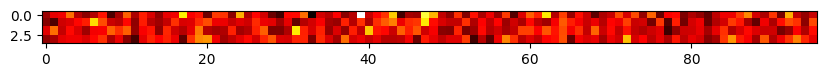

In [80]:
nlp = spacy.load('en_core_web_sm')
doc = nlp(sentence)

vectors = np.zeros((len(words), 96))

for token, i in zip(doc, range(len(words))):  
  vectors[i,:] = token.vector

plt.figure(figsize=(10,60))
plt.imshow(vectors, cmap='hot', interpolation='nearest')
plt.show()

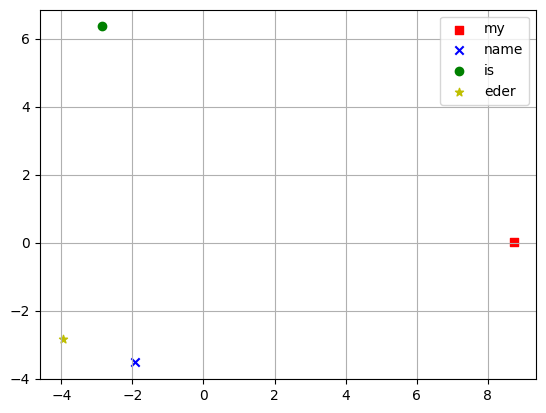

In [81]:
colors = ['r', 'b', 'g', 'y']
markers = ['s', 'x', 'o', '*']

pca = PCA(n_components=2)
X_pca = pca.fit_transform(vectors)

for l, c, m in zip(range(len(X_pca)), colors, markers):
  plt.scatter(X_pca[l, 0], X_pca[l, 1], c=c, label=words[l], marker=m)
plt.legend()
plt.grid()
plt.show()


In [82]:
inputs = torch.tensor(vectors[:, np.newaxis,:])
inputs.size()


torch.Size([4, 1, 96])

In [83]:
parameter_shape = inputs.size()[-2:]
gamma = nn.Parameter(torch.ones(parameter_shape))
beta =  nn.Parameter(torch.zeros(parameter_shape))

In [84]:
gamma.size(), beta.size()

(torch.Size([1, 96]), torch.Size([1, 96]))

In [85]:
dims = [-(i + 1) for i in range(len(parameter_shape))]

In [86]:
dims

[-1, -2]

In [87]:
mean = inputs.mean(dim=dims, keepdim=True)
mean.size()

torch.Size([4, 1, 1])

In [88]:
mean

tensor([[[ 0.0099]],

        [[-0.0247]],

        [[-0.0037]],

        [[ 0.0037]]], dtype=torch.float64)

In [89]:
var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
epsilon = 1e-5
std = (var + epsilon).sqrt()
std

tensor([[[1.1530]],

        [[0.7647]],

        [[0.7665]],

        [[0.7535]]], dtype=torch.float64)

In [90]:
y = (inputs - mean) / std
y

tensor([[[-7.1828e-01, -3.0304e-02,  6.1313e-02,  1.1673e+00, -4.6551e-01,
          -8.2873e-01, -5.0675e-01,  3.2844e-01, -1.4011e+00, -5.9747e-01,
           1.0304e+00, -5.5603e-01,  4.2334e-01, -1.6459e-01, -8.0087e-01,
          -3.7800e-03,  5.1544e-02,  2.3639e+00,  1.4877e-01,  3.3085e-01,
          -1.1165e+00,  6.8230e-01,  6.2146e-01, -8.3867e-01,  1.7439e+00,
          -5.3319e-01,  2.0642e-01, -2.3067e-01, -1.1523e+00, -1.5155e+00,
           2.2809e-01,  2.4803e-01,  1.1648e+00, -2.0223e+00, -2.3052e-01,
          -4.7302e-01,  1.7572e-01, -8.4964e-01, -4.7600e-01,  3.9864e+00,
          -3.1451e-01,  2.0101e-01,  6.1879e-01,  2.0059e+00, -1.4596e+00,
          -6.1469e-01, -6.9915e-01,  2.7914e+00,  1.7826e+00, -3.7686e-01,
          -8.2023e-01,  6.0308e-01, -9.3361e-01,  3.0689e-01, -5.9038e-01,
           3.2280e-02, -7.2554e-01,  6.9183e-01, -1.3580e+00, -1.3197e-01,
           1.0065e+00,  4.7283e-01,  2.3094e+00, -4.9637e-01,  7.4617e-01,
          -7.3944e-01,  2

In [91]:
out = gamma * y + beta

In [92]:
out

tensor([[[-7.1828e-01, -3.0304e-02,  6.1313e-02,  1.1673e+00, -4.6551e-01,
          -8.2873e-01, -5.0675e-01,  3.2844e-01, -1.4011e+00, -5.9747e-01,
           1.0304e+00, -5.5603e-01,  4.2334e-01, -1.6459e-01, -8.0087e-01,
          -3.7800e-03,  5.1544e-02,  2.3639e+00,  1.4877e-01,  3.3085e-01,
          -1.1165e+00,  6.8230e-01,  6.2146e-01, -8.3867e-01,  1.7439e+00,
          -5.3319e-01,  2.0642e-01, -2.3067e-01, -1.1523e+00, -1.5155e+00,
           2.2809e-01,  2.4803e-01,  1.1648e+00, -2.0223e+00, -2.3052e-01,
          -4.7302e-01,  1.7572e-01, -8.4964e-01, -4.7600e-01,  3.9864e+00,
          -3.1451e-01,  2.0101e-01,  6.1879e-01,  2.0059e+00, -1.4596e+00,
          -6.1469e-01, -6.9915e-01,  2.7914e+00,  1.7826e+00, -3.7686e-01,
          -8.2023e-01,  6.0308e-01, -9.3361e-01,  3.0689e-01, -5.9038e-01,
           3.2280e-02, -7.2554e-01,  6.9183e-01, -1.3580e+00, -1.3197e-01,
           1.0065e+00,  4.7283e-01,  2.3094e+00, -4.9637e-01,  7.4617e-01,
          -7.3944e-01,  2

In [93]:
class LayerNormalization():
    def __init__(self, parameters_shape, eps=1e-5):
        self.parameters_shape=parameters_shape
        self.eps=eps
        self.gamma = nn.Parameter(torch.ones(parameters_shape))
        self.beta =  nn.Parameter(torch.zeros(parameters_shape))

    def forward(self, input):
        dims = [-(i + 1) for i in range(len(self.parameters_shape))]
        mean = inputs.mean(dim=dims, keepdim=True)        
        var = ((inputs - mean) ** 2).mean(dim=dims, keepdim=True)
        std = (var + self.eps).sqrt()
        y = (inputs - mean) / std        
        out = self.gamma * y  + self.beta
        
        return out

In [94]:
batch_size = 3
sentence_length = 5
embedding_dim = 8 
inputs = torch.randn(sentence_length, batch_size, embedding_dim)

print(f"input \n ({inputs.size()}) = \n {inputs}")

input 
 (torch.Size([5, 3, 8])) = 
 tensor([[[-1.1023e-01,  3.4585e-01, -3.2596e-01, -6.1315e-02, -7.5165e-01,
           7.6283e-01, -2.4604e-01, -1.1015e+00],
         [ 2.0695e+00, -8.7884e-01,  1.3877e+00,  1.1412e+00,  1.6648e+00,
           1.0167e+00,  3.1701e-01, -8.8471e-01],
         [-4.0677e-01, -7.5954e-01, -3.9885e-02, -5.4402e-01,  1.0328e+00,
           1.0275e+00,  8.3632e-01,  7.5875e-01]],

        [[-1.0420e+00,  7.2300e-02,  1.3622e+00, -1.5150e-01,  1.0414e+00,
           2.4138e-01, -3.0594e-01, -5.5962e-01],
         [-1.6730e+00,  3.8429e-01, -5.5865e-01,  1.2448e+00,  8.9275e-01,
          -2.3253e-03,  2.4856e+00,  4.8839e-01],
         [-1.0380e+00,  1.0603e+00, -6.5298e-01,  5.1031e-01, -7.5932e-02,
          -4.1277e-01,  6.9611e-01,  9.0456e-01]],

        [[ 1.4839e+00,  5.5204e-01,  9.4239e-02, -8.9798e-01, -3.7348e-01,
           1.9000e+00, -1.0376e+00, -7.2447e-01],
         [-3.3320e-01,  4.5180e-01,  5.7696e-02, -8.2255e-01, -5.5846e-01,
          

In [ ]:
layer_norm = LayerNormalization(inputs.size()[-1:])

In [ ]:
out = layer_norm.forward(inputs)

In [ ]:
out[0].mean(), out[0].std()

(tensor(-9.9341e-09, grad_fn=<MeanBackward0>),
 tensor(1.0215, grad_fn=<StdBackward0>))